In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from tensorflow.keras.datasets import cifar100

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# CIFAR-100 has 100 classes, labeled 0 to 99
num_classes = 100

# Load class names for CIFAR-100
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee',
    'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus',
    'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch',
    'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant',
    'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo',
    'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter',
    'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain',
    'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon',
    'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel',
    'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
    'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf',
    'woman', 'worm'
]


# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

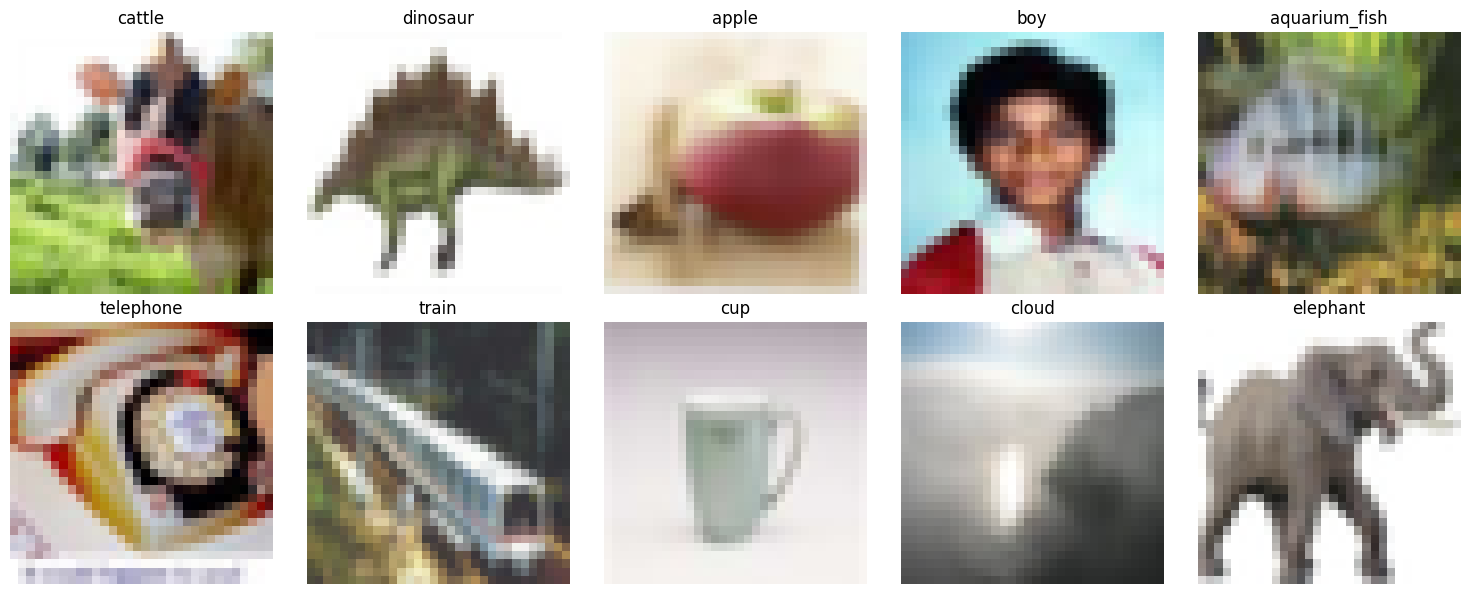

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6), dpi=100)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], interpolation='nearest')
    plt.title(class_names[y_train[i][0]])  # or .item()
    plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
num_classes = 100
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)
datagen.fit(x_train)

In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

def improved_strong_cnn(input_shape=(32, 32, 3), num_classes=100):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.3))

    # Block 2
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.4))

    # Block 3
    model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.5))

    # Block 4
    model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())

    # Fully Connected
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.6))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


# Compile model
model = improved_strong_cnn(input_shape=x_train.shape[1:], num_classes=num_classes)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

In [7]:
# Train model with data augmentation
history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=128),
    epochs=100,
    validation_data=(x_test, y_test_cat),
    callbacks=[early_stopping, lr_scheduler],
    verbose=2
)

Epoch 1/100
391/391 - 34s - loss: 4.4806 - accuracy: 0.0740 - val_loss: 4.4066 - val_accuracy: 0.0593 - lr: 0.0010 - 34s/epoch - 86ms/step
Epoch 2/100
391/391 - 27s - loss: 3.6897 - accuracy: 0.1532 - val_loss: 3.4467 - val_accuracy: 0.2004 - lr: 0.0010 - 27s/epoch - 69ms/step
Epoch 3/100
391/391 - 28s - loss: 3.2652 - accuracy: 0.2191 - val_loss: 3.1017 - val_accuracy: 0.2568 - lr: 0.0010 - 28s/epoch - 73ms/step
Epoch 4/100
391/391 - 29s - loss: 2.9976 - accuracy: 0.2665 - val_loss: 2.8717 - val_accuracy: 0.2778 - lr: 0.0010 - 29s/epoch - 74ms/step
Epoch 5/100
391/391 - 29s - loss: 2.7511 - accuracy: 0.3096 - val_loss: 2.6463 - val_accuracy: 0.3399 - lr: 0.0010 - 29s/epoch - 75ms/step
Epoch 6/100
391/391 - 29s - loss: 2.5513 - accuracy: 0.3465 - val_loss: 2.3177 - val_accuracy: 0.3984 - lr: 0.0010 - 29s/epoch - 75ms/step
Epoch 7/100
391/391 - 30s - loss: 2.3705 - accuracy: 0.3783 - val_loss: 2.2318 - val_accuracy: 0.4187 - lr: 0.0010 - 30s/epoch - 77ms/step
Epoch 8/100
391/391 - 30s -

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Get predicted class labels from model
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n")
print(report)


313/313 [==============================] - 2s 6ms/step
Classification Report:

                   precision    recall  f1-score   support

            apple       0.89      0.75      0.82       100
    aquarium_fish       0.84      0.80      0.82       100
             baby       0.61      0.49      0.54       100
             bear       0.52      0.46      0.49       100
           beaver       0.42      0.52      0.46       100
              bed       0.67      0.77      0.72       100
              bee       0.69      0.70      0.70       100
           beetle       0.63      0.66      0.64       100
          bicycle       0.72      0.86      0.78       100
           bottle       0.84      0.76      0.80       100
             bowl       0.62      0.44      0.51       100
              boy       0.49      0.51      0.50       100
           bridge       0.71      0.79      0.75       100
              bus       0.62      0.61      0.61       100
        butterfly       0.52      0

In [11]:
# Calculate overall test accuracy
accuracy = np.mean(y_pred == y_true)
print(f"Overall Test Accuracy: {accuracy:.4f}")


Overall Test Accuracy: 0.6628


In [12]:
# Update for CIFAR-100
num_classes = 100
correct_per_class = np.zeros(num_classes)
total_per_class = np.zeros(num_classes)

for true, pred in zip(y_true, y_pred):
    total_per_class[true] += 1
    if true == pred:
        correct_per_class[true] += 1

print("\nPer-Class Accuracy:")
for i in range(num_classes):
    acc = correct_per_class[i] / total_per_class[i]
    print(f"Class {i}: {acc:.4f}")



Per-Class Accuracy:
Class 0: 0.7500
Class 1: 0.8000
Class 2: 0.4900
Class 3: 0.4600
Class 4: 0.5200
Class 5: 0.7700
Class 6: 0.7000
Class 7: 0.6600
Class 8: 0.8600
Class 9: 0.7600
Class 10: 0.4400
Class 11: 0.5100
Class 12: 0.7900
Class 13: 0.6100
Class 14: 0.7000
Class 15: 0.6500
Class 16: 0.7600
Class 17: 0.7400
Class 18: 0.5700
Class 19: 0.6500
Class 20: 0.8400
Class 21: 0.8000
Class 22: 0.7600
Class 23: 0.6900
Class 24: 0.8000
Class 25: 0.5100
Class 26: 0.6500
Class 27: 0.5200
Class 28: 0.7900
Class 29: 0.5900
Class 30: 0.5900
Class 31: 0.6000
Class 32: 0.6100
Class 33: 0.6000
Class 34: 0.5800
Class 35: 0.4600
Class 36: 0.6600
Class 37: 0.8000
Class 38: 0.4600
Class 39: 0.8800
Class 40: 0.5700
Class 41: 0.8400
Class 42: 0.7600
Class 43: 0.7300
Class 44: 0.4100
Class 45: 0.6100
Class 46: 0.4000
Class 47: 0.7300
Class 48: 0.9500
Class 49: 0.8400
Class 50: 0.3100
Class 51: 0.6600
Class 52: 0.7100
Class 53: 0.8700
Class 54: 0.7700
Class 55: 0.2300
Class 56: 0.8500
Class 57: 0.6700
Cla

In [13]:
# CIFAR-100 fine label names (manually defined)
fine_label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'cabbage',
    'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee',
    'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
    'kangaroo', 'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard',
    'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom',
    'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck',
    'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon',
    'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
    'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf',
    'woman', 'worm'
]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(100, 100))  # Large figure size for 100 classes

ax = sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=fine_label_names,
    yticklabels=fine_label_names,
    annot_kws={"size": 45},    # Smaller digit size
    cbar=False,               # Hide colorbar if space is needed
    
)

# Rotate and resize tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=50)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=50)

plt.title("Confusion Matrix (CIFAR-100)", fontsize=40)
plt.xlabel("Predicted Label", fontsize=30)
plt.ylabel("True Label", fontsize=30)
plt.tight_layout()
plt.show()

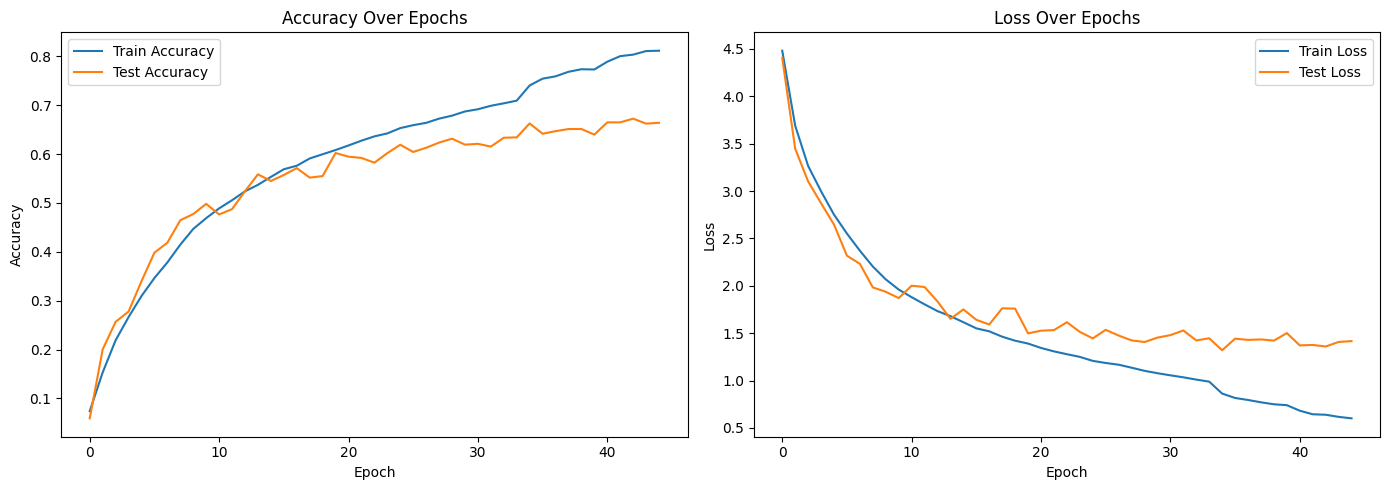

In [14]:
plt.figure(figsize=(14, 5), dpi=100)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


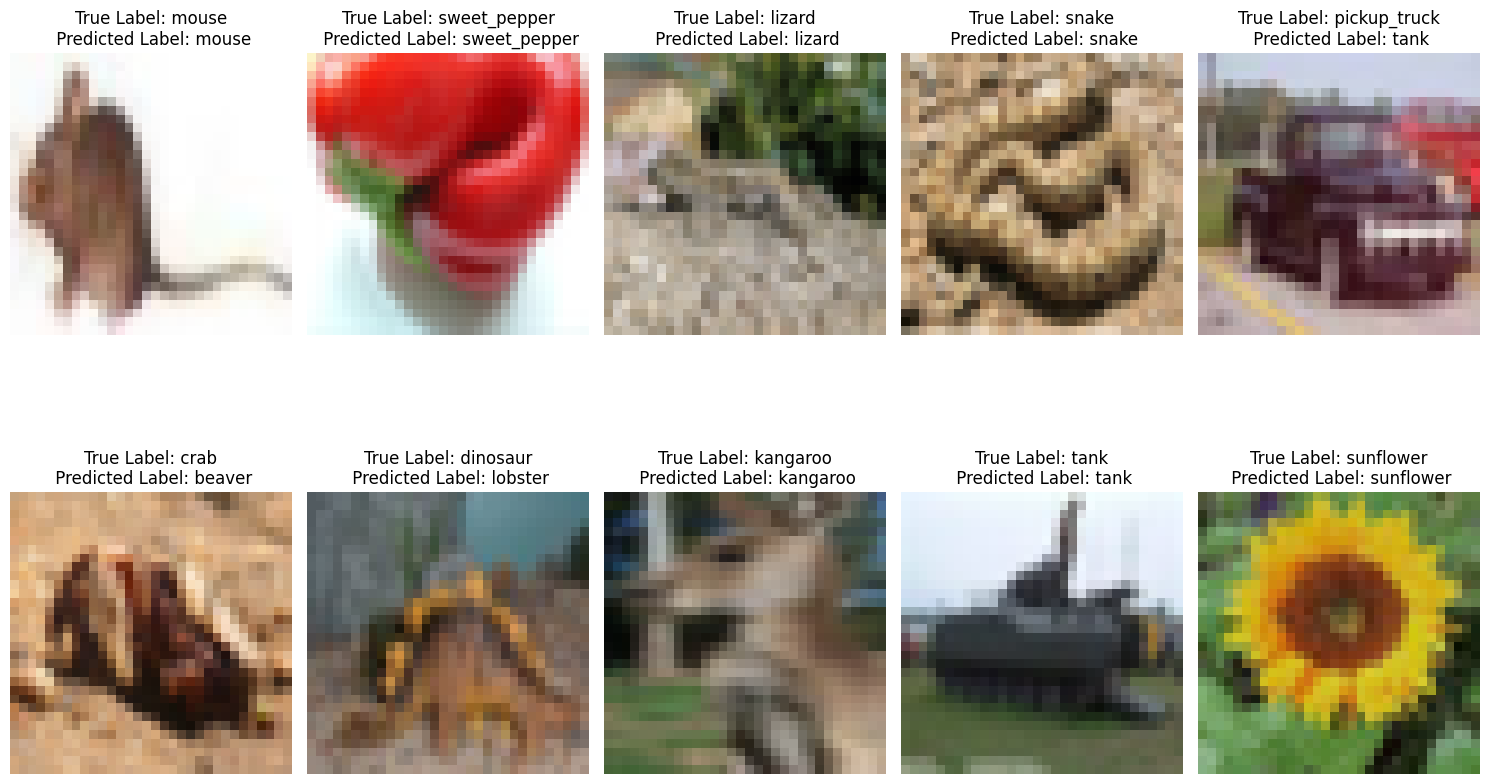

In [15]:
import random

plt.figure(figsize=(15, 10))
indices = random.sample(range(len(x_test)), 10)

for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    true_label = class_names[y_test[idx][0]]
    pred_label = class_names[y_pred[idx]]
    plt.title(f"True Label: {true_label}\n Predicted Label: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()
